### Christopher Olah's blog link for MNIST and PCA
https://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [1]:
# In "6.9 PCA Code example" Notebook we have seen how we can perform PCA on a nD Matrix X.
# But instead of performing 5 steps every time for PCA we can directly perform it using "sklearn" library.
# Those 5 steps are good for understanding how PCA works.

# PCA using sklearn

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# We need matplotlib to map plt.scatter in sns.FacetGrid

import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

In [4]:
d0 = pd.read_csv("MNIST_train.csv")

In [5]:
d0

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data preprosessing: Sampling and Standardization

In [6]:
# We need a dataframe with only X values. So we have to saperate label from X values.

labels = d0['label']                   # it is containing 42000x1 Y values

In [7]:
d1 = d0.drop('label', axis=1)
d1                               # it is containing 42000x784 X values

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Taking a sample of 15000 datapoints from Parent dataset.

In [8]:
raw_data = d1.head(15000)
Y = labels.head(15000)

In [9]:
raw_data                         # it is containing 15000x784 X values

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y                                # it is containing 15000x1 Y values

0        1
1        0
2        1
3        4
4        0
        ..
14995    1
14996    4
14997    8
14998    9
14999    6
Name: label, Length: 15000, dtype: int64

## Standardization of raw_data.

In [11]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(raw_data)

print("Shape", X.shape)
X

Shape (15000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Now our Data is in Standard Form We can proceed to Compute our X_dash.
### X_dash: matrix where all our 784d data is projected on only top 2 principal axes.

# PCA using Scikit-Learn

In [12]:
from sklearn import decomposition

In [13]:
# Initalizing PCA object of decompositio module.
pca_obj = decomposition.PCA()      # Calling PCA class's constructor.

In [14]:
# configuring the parameteres
# the number of components = 2. This means we need only 2 principal axes. Means 784d to 2D.
pca_obj.n_components = 2

# Calculating X_dash from X matrix.
X_dash = pca_obj.fit_transform(X)

# pca_reduced will contain the 2-d projects of simple data
print("shape of X_dash.shape = ", X_dash.shape)
X_dash

shape of X_dash.shape =  (15000, 2)


array([[-5.04359533, -5.55855983],
       [19.30527772,  6.19386055],
       [-7.67876524, -1.90991322],
       ...,
       [-1.50726929, -2.14791158],
       [-6.53730774,  3.20401431],
       [-1.25626049, -6.87888679]])

In [15]:
# Notice that in Array X_dash[1st principlr axis, 2nd principal axis]

# Visualizing the Data.

In [16]:
# attaching the label for each 2-d data point
# Puting X_dash and Y values in Same array 
import numpy as np

pca_data = np.vstack((X_dash.T, Y)).T

In [17]:
pca_data

array([[-5.04359533, -5.55855983,  1.        ],
       [19.30527772,  6.19386055,  0.        ],
       [-7.67876524, -1.90991322,  1.        ],
       ...,
       [-1.50726929, -2.14791158,  8.        ],
       [-6.53730774,  3.20401431,  9.        ],
       [-1.25626049, -6.87888679,  6.        ]])

In [18]:
# creating a new data fram which help us in ploting the result data

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
pca_df

,1st_principal,2nd_principal,label
0,-5.043595,-5.558560,1.0
1,19.305278,6.193861,0.0
2,-7.678765,-1.909913,1.0
3,-0.464844,5.525901,4.0
4,26.644292,6.366542,0.0
...,...,...,...
14995,-4.758942,3.139511,1.0
14996,-1.314216,1.946724,4.0
14997,-1.507269,-2.147912,8.0
14998,-6.537308,3.204014,9.0


In [19]:
# Seaborn Scatter plot with hue=label

<function matplotlib.pyplot.show(*args, **kw)>

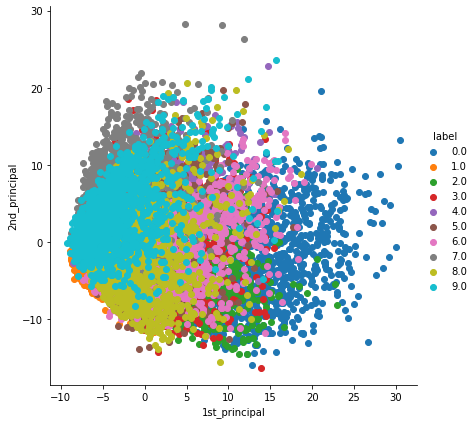

In [22]:
sns.FacetGrid(pca_df, hue='label', height=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show